## Steps
- read and visualise the data
- prepare the data for modeling
- train the model
- Residual analysis
- prediction and evaluation on the test data

### Importing and Understanding Data

In [139]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [140]:
#Import necessary libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [141]:
# Importing day.csv
bike_df = pd.read_csv('day.csv')

In [142]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [143]:
bike_df.shape

(730, 16)

In [144]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###  Visualising the Data

#### Analysing the categorical columns 

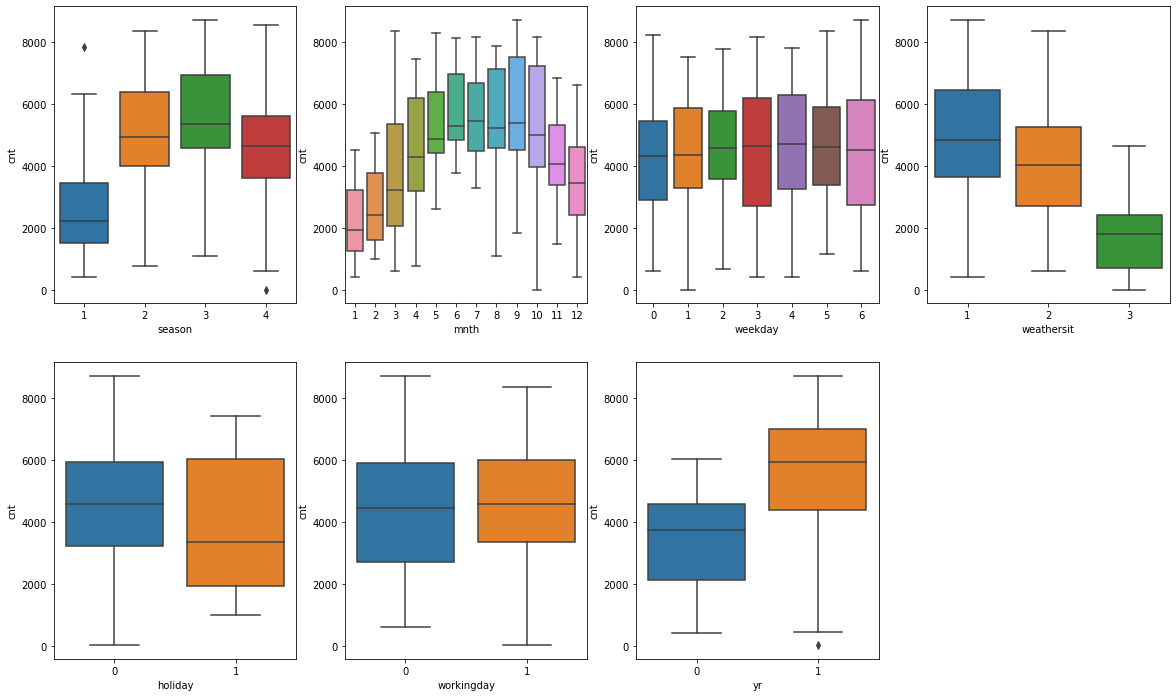

In [145]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

function to create barplot for categorical columns

In [146]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike_df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike_df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

visualising season

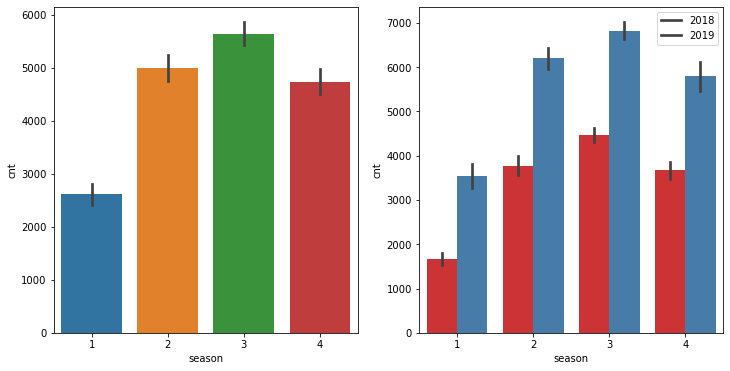

In [147]:
plot_cat_columns('season')

- Bookings are more during fall season. 
- Bookings are increasing year on year

visualising month

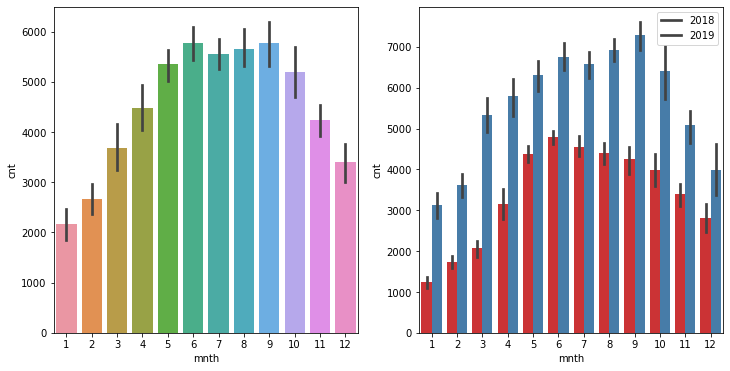

In [148]:
plot_cat_columns('mnth')

Bookings are more during the months of may, june, july, aug, sep and oct. Overall booking for each month have increased from 2018 to 2019.

Visualising weathersit

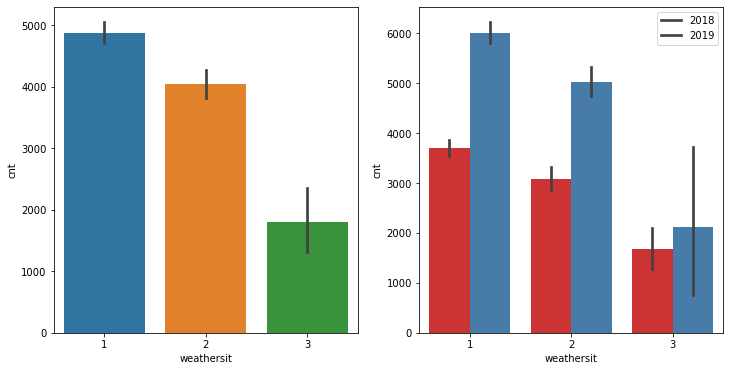

In [149]:
plot_cat_columns('weathersit')

Bookings are more during clear weathersit.

Visualising weekday

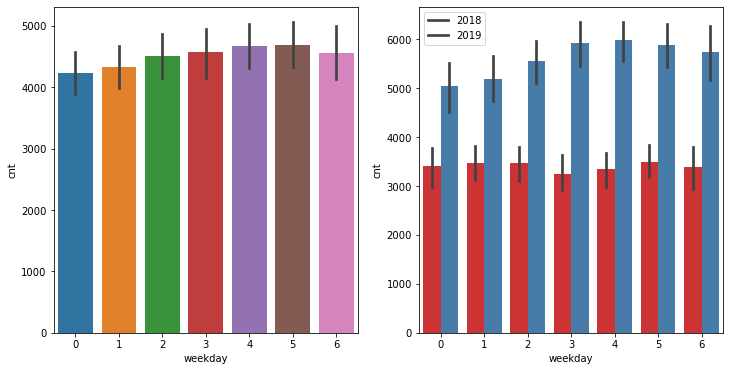

In [150]:
plot_cat_columns('weekday')

No much difference wrt booking during the days of the week. 

Visualising holiday

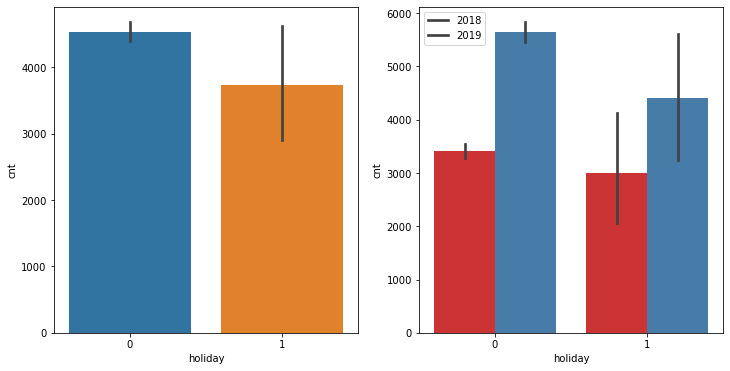

In [151]:
plot_cat_columns('holiday')

Bookings are less during holidays

Visualising workingday

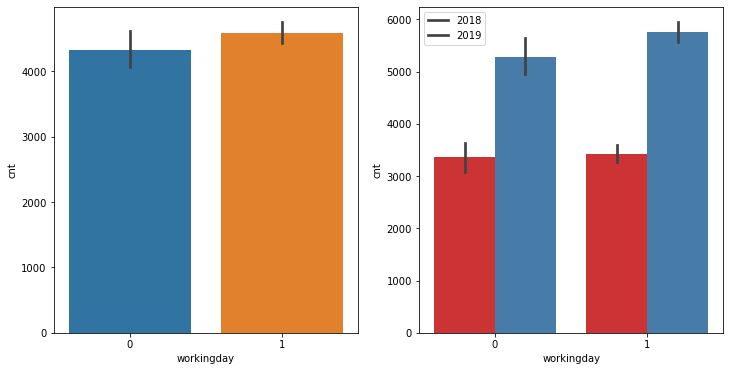

In [152]:
plot_cat_columns('workingday')

Bookings are almost same 

Visualising year

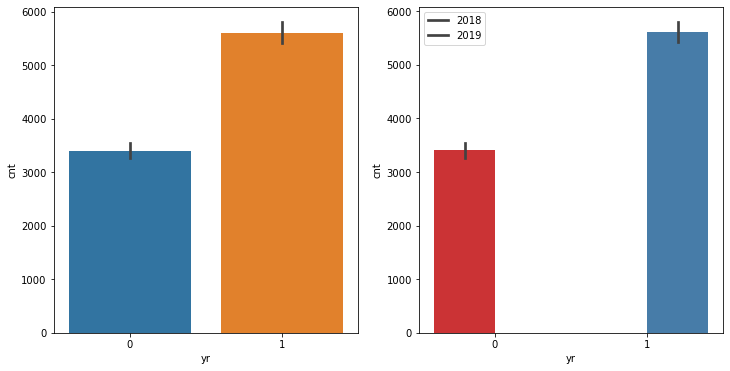

In [153]:
plot_cat_columns('yr')

Overall Bookings are more in 2019

#### Analysing the numerical columns 

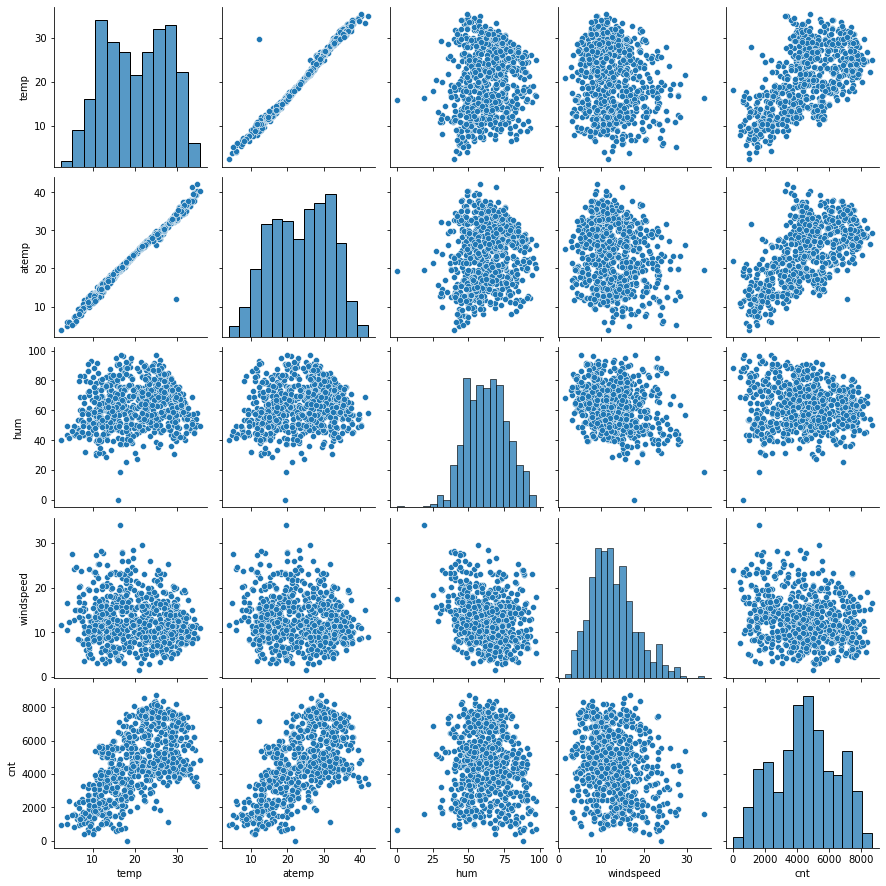

In [154]:
sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Checking the correlation

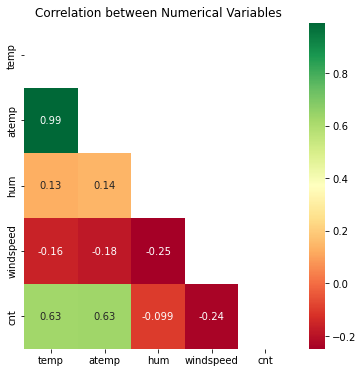

In [155]:
plt.figure(figsize = (6,6))
matrix = np.triu(bike_df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

- There is linear relationship between temp and atemp.
- We can decide features of consider based on VIF and p-value.

### Data Preparation

#### dropping the unwanted columns
- instant has only index for the row,
- dteday has date which can be compensated by year and month column,
- casual and registered seems to be the breakup by category for cnt column.

In [156]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

- create mapping for the season column

In [157]:
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

- create mapping for the month column

In [158]:
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

- create mapping for the weekday column

In [159]:
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

- create mapping for the weathersit column

In [160]:
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [161]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

The variables `season`,`month`,`workingday`and `weathersit` have different levels. We need to convert these levels into integer as well. For this, we will use `dummy variables`.

In [162]:

months_df=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [163]:
bike_new_df = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [164]:
bike_new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


we can drop unnecessary columns as we have already created dummy variable out of it.

In [165]:
bike_new_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [166]:
bike_new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [167]:
bike_new_df.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

In [168]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_new_df, train_size = 0.7, random_state = 100)

In [169]:
df_train.shape

(510, 30)

In [170]:
df_test.shape

(220, 30)

### Rescaling the Features 

We will use MinMax scaling.

In [171]:
scaler = MinMaxScaler()

Check the train dataset before scaling

In [172]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


- Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [173]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

Check the train dataset after scaling

In [174]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


check the correlation coefficients by plotting heatmap

### Dividing into X and Y sets for the model building

In [175]:
y_train = df_train.pop('cnt')
X_train = df_train

Identify the valid attributes using RFE

In [176]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [177]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [178]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [179]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [180]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [181]:
X_train_rfe = X_train[col]

In [182]:
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


Humidity shows highest VIF Value

### Building a linear model

Building first linear model

In [183]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        01:15:14   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

As humidity shows high VIF values hence we can drop it

In [184]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


Building second linear regression model

In [185]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        01:15:14   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

 We can drop holiday variable as it has high p-value

In [186]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,yr,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


Building third linear regression model

In [187]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.68e-189
Time:                        01:15:14   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

 We can drop temp variable as it has high VIF

In [188]:
X_train_new = X_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
(X_train_new)

,yr,workingday,windspeed,jan,july,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,1,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,0,1,0,1,0,1,0
111,0,1,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.187140,0,0,0,0,0,0,0,0,0
53,0,1,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0.431816,0,0,0,1,0,1,0,0,1
79,0,1,0.529881,0,0,0,0,0,1,0,1,0


In [189]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.41e-154
Time:                        01:15:14   Log-Likelihood:                 424.05
No. Observations:                 510   AIC:                            -822.1
Df Residuals:                     497   BIC:                            -767.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5364      0.020     27.

We can drop july variable as it has high p-value

In [190]:
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
(X_train_new)

,yr,workingday,windspeed,jan,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,1,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,1,0,1,1,0,0
728,1,0,0.663106,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,1,0,1,0,1,0
111,0,1,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.187140,0,0,0,0,0,0,0,0
53,0,1,0.111379,0,0,0,0,0,1,0,0
350,0,0,0.431816,0,0,1,0,1,0,0,1
79,0,1,0.529881,0,0,0,0,1,0,1,0


In [191]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.01e-155
Time:                        01:15:14   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5332      0.018     30.

In [192]:
lr_5.params

const             0.533171
yr                0.248004
workingday        0.056374
windspeed        -0.188695
jan              -0.103255
sep               0.071471
sat               0.064819
Light_snowrain   -0.302344
Misty            -0.087382
spring           -0.258093
summer           -0.039401
winter           -0.074260
dtype: float64

In [193]:
X_train_new.columns

Index(['yr', 'workingday', 'windspeed', 'jan', 'sep', 'sat', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [194]:
y_train_pred = lr_5.predict(X_train_lm_5)

Normality of error terms

Text(0.5, 0, 'Errors')

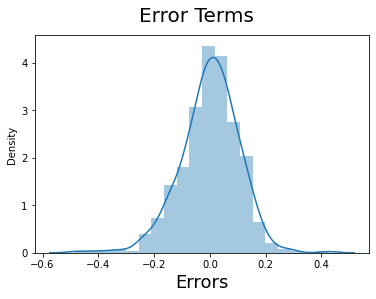

In [195]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Predict and evaluate the test data

#### Applying the scaling on the test sets

In [196]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### dividing into X_test and y_test

In [197]:
y_test = df_test.pop('cnt')
X_test = df_test

Creating X_test_new dataframe by dropping variables from X_test

In [198]:
X_test_new = X_test[X_train_new.columns]

Adding a constant variable 

In [199]:
X_test_new = sm.add_constant(X_test_new)

Making predictions

In [200]:
y_pred = lr_5.predict(X_test_new)

### Model Evaluation

In [201]:
r2 = r2_score(y_test,y_pred)
r2

0.7417351441317017

Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

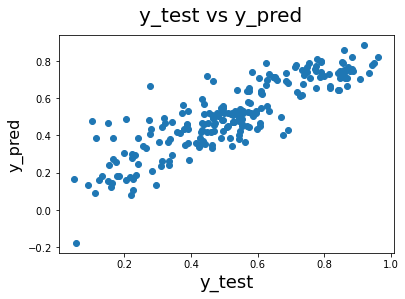

In [202]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [203]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7023


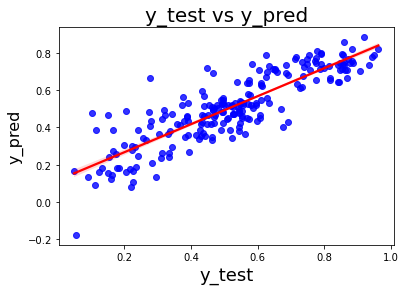

In [204]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

- R2 for train data - 0.78
- adjusted R2 for train data - 0.77

- R2 for test data - 0.74
- adjusted R2 for test data - 0.70

The features to consider to predict the demand for the bikes are
`year`, `workingday`, `windspeed`, `mnth`, `weathersit` and `season`